<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>AdaBoost</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
sc = StandardScaler()

In [5]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=1)

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [9]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=500,
                         learning_rate=0.1, random_state=0)

In [10]:
dt = dt.fit(X_train_std, y_train)

In [11]:
dt_train_pred = dt.predict(X_train_std)
dt_test_pred = dt.predict(X_test_std)

In [12]:
dt_train = accuracy_score(y_train, dt_train_pred)
dt_test = accuracy_score(y_test, dt_test_pred)

In [13]:
print('Decision Tree train/test accuracies %.3f/%.3f' % (dt_train,dt_test))

Decision Tree train/test accuracies 0.667/0.667


In [14]:
ada = ada.fit(X_train_std, y_train)

In [15]:
ada_train_pred = ada.predict(X_train_std)
ada_test_pred = ada.predict(X_test_std)

In [16]:
ada_train = accuracy_score(y_train, ada_train_pred)
ada_test = accuracy_score(y_test, ada_test_pred)

In [17]:
print('AdaBoost Random Forest train/test accuracies %.3f/%.3f' % (ada_train,ada_test))

AdaBoost Random Forest train/test accuracies 0.962/0.956


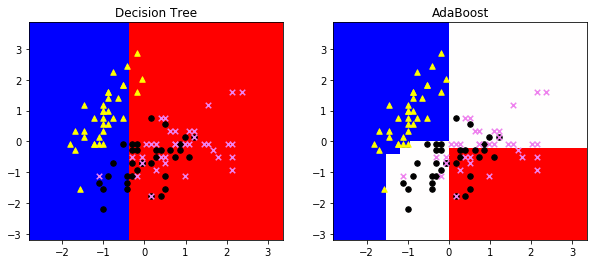

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
res = 0.02
X2D = X_train_std[:,[0,1]]

x1min, x1max = X2D[:,0].min() -1, X2D[:,0].max() + 1
x2min, x2max = X2D[:,1].min() -1, X2D[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

for clf, ax, title in zip([dt, ada], axs, ['Decision Tree','AdaBoost']):
    clf.fit(X2D, y_train)
    output = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    ax.pcolormesh(xx1,xx2, output, cmap=plt.cm.bwr)
    ax.scatter(X2D[y_train==0, 0], X2D[y_train==0, 1], s=30, color='yellow', marker='^')
    ax.scatter(X2D[y_train==1, 0], X2D[y_train==1, 1], s=30, color='black', marker='o')
    ax.scatter(X2D[y_train==2, 0], X2D[y_train==2, 1], s=30, color='violet', marker='x')
    ax.set_title(title)  

## Reference:
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html